In [172]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',500)
import seaborn as sns
import matplotlib.pyplot as plt  

In [47]:
test = pd.read_csv('test_output.csv')
test['date'] = test['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
test['YearMonth_test'] = test['date'].astype(str).apply(lambda x: x[:4] + x[5:7])
test['YearMonth_test'] = test['YearMonth_test'].apply(pd.to_numeric)

In [266]:
# Single loop test
#YearMonth = list(set(train['YearMonth'].values.tolist()))
portfolio_return = pd.DataFrame()
temp_test = test[test['YearMonth_test'] == 193208]  #date from test dataset is the real month for portfreturn
#Implement portfolio strategy based on conventional or residual weight

#temp_test['con_real_RET'] = - temp_test['test_conv_weight']* temp_test['RET']/(temp_test['test_conv_weight'].abs())
#temp_test['resd_real_RET'] = - temp_test['test_red_weight']* temp_test['RET']/(temp_test['test_red_weight'].abs())
#temp_test['con_real_RET_weight'] = (temp_test['test_conv_weight'].abs()).sum()
temp_test['con_real_RET'] = temp_test['test_conv_weight']/((temp_test['test_conv_weight'].abs()).sum()) * temp_test['RET']
temp_test['resd_real_RET'] = temp_test['test_red_weight']/((temp_test['test_red_weight'].abs()).sum())* temp_test['RET']

#Get portfolio return 
temp_test['con_port_RET'] = temp_test['con_real_RET'].sum() 
temp_test['resd_port_RET'] = temp_test['resd_real_RET'].sum() 

portfolio_return = portfolio_return.append(temp_test.iloc[0])
portfolio_return

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,CUSIP,EXCHCD,PERMNO,PRC,RET,RETX,SHRCD,SHROUT,TICKER,YearMonth_test,con_port_RET,con_real_RET,date,mkt_cap,mkt_cap_median,resd_port_RET,resd_real_RET,std,test_conv_weight,test_red_weight
0,00338690,1.0,10030.0,15.375,0.336957,0.336957,10.0,628.0,NaN,193208.0,-0.193556,-0.00142,1932-08-31,9655.5,4914.25,-0.059975,-0.003781,0.07969,-0.000745,-0.000654


In [271]:
#  loop
portfolio_return = pd.DataFrame()
for i in (test['YearMonth_test'].unique()):
    temp_test = test[test['YearMonth_test'] == i]
    #1
    temp_test['con_real_RET'] = ( temp_test['test_conv_weight']* temp_test['RET'])/(temp_test['test_conv_weight'].abs())
    temp_test['resd_real_RET'] = ( temp_test['test_red_weight']* temp_test['RET'])/(temp_test['test_red_weight'].abs())
    #Get portfolio return 
    temp_test['con_port_RET'] = temp_test['con_real_RET'].mean() 
    temp_test['resd_port_RET'] = temp_test['resd_real_RET'].mean() 
    
    #2
    #temp_test['con_real_RET'] = (temp_test['test_conv_weight']/(temp_test['test_conv_weight'].abs().sum()))* temp_test['RET']
    #temp_test['resd_real_RET'] = (temp_test['test_red_weight']/(temp_test['test_red_weight'].abs().sum()))* temp_test['RET']
    
    #Get portfolio return 
    #temp_test['con_port_RET'] = temp_test['con_real_RET'].sum() 
    #temp_test['resd_port_RET'] = temp_test['resd_real_RET'].sum() 
    
    monthly = temp_test.iloc[0]
    portfolio_return = portfolio_return.append(monthly)
    print(i)
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

193208
193209
193210
193211
193212
193301
193302
193303
193304
193305
193306
193307
193308
193309
193310
193311
193312
193401
193402
193403
193404
193405
193406
193407
193408
193409
193410
193411
193412
193501
193502
193503
193504
193505
193506
193507
193508
193509
193510
193511
193512
193601
193602
193603
193604
193605
193606
193607
193608
193609
193610
193611
193612
193701
193702
193703
193704
193705
193706
193707
193708
193709
193710
193711
193712
193801
193802
193803
193804
193805
193806
193807
193808
193809
193810
193811
193812
193901
193902
193903
193904
193905
193906
193907
193908
193909
193910
193911
193912
194001
194002
194003
194004
194005
194006
194007
194008
194009
194010
194011
194012
194101
194102
194103
194104
194105
194106
194107
194108
194109
194110
194111
194112
194201
194202
194203
194204
194205
194206
194207
194208
194209
194210
194211
194212
194301
194302
194303
194304
194305
194306
194307
194308
194309
194310
194311
194312
194401
194402
194403
194404
194405
194406

In [261]:
portfolio_return.head()

,CUSIP,EXCHCD,PERMNO,PRC,RET,RETX,SHRCD,SHROUT,TICKER,YearMonth_test,con_port_RET,con_real_RET,date,mkt_cap,mkt_cap_median,resd_port_RET,resd_real_RET,std,test_conv_weight,test_red_weight
0,00338690,1.0,10030.0,15.375,0.336957,0.336957,10.0,628.0,NaN,193208.0,-0.193556,-0.001420,1932-08-31,9655.50,4914.2500,-0.059975,-0.003781,0.079690,-0.000745,-0.000654
143,00338690,1.0,10030.0,14.500,-0.047154,-0.056911,10.0,628.0,NaN,193209.0,0.028855,-0.000129,1932-09-30,9106.00,4609.6875,0.034623,-0.000121,0.079727,0.000675,0.000206
289,00338690,1.0,10030.0,11.250,-0.224138,-0.224138,10.0,628.0,NaN,193210.0,-0.006901,-0.000509,1932-10-31,7065.00,3722.8125,0.029950,-0.000094,0.079606,0.000170,0.000030
438,00338690,1.0,10030.0,10.000,-0.111111,-0.111111,10.0,628.0,NaN,193211.0,-0.030245,-0.000746,1932-11-30,6280.00,3480.2500,0.003769,-0.001009,0.080361,0.000546,0.000501
588,00338690,1.0,10030.0,10.125,0.027500,0.012500,10.0,614.0,NaN,193212.0,-0.004379,0.000148,1932-12-31,6216.75,3219.0000,0.013772,-0.000006,0.080052,0.000336,-0.000012


In [262]:
portfolio_return['con_port_RET'].mean()

0.004202278521127538

In [272]:
plotdata = portfolio_return[['date','con_port_RET','resd_port_RET']]
plotdata['date'] = plotdata['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
plotdata['con_port_RET'] = plotdata['con_port_RET'] + 1 
plotdata['resd_port_RET']= plotdata['resd_port_RET'] + 1 
plotdata['conv_port_cum_RET'] = plotdata['con_port_RET'].cumprod()
plotdata['resd_port_cum_RET'] = plotdata['resd_port_RET'].cumprod()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [220]:
portfolio_return.head()

,CUSIP,EXCHCD,PERMNO,PRC,RET,RETX,SHRCD,SHROUT,TICKER,YearMonth_test,con_port_RET,con_real_RET,date,mkt_cap,mkt_cap_median,resd_port_RET,resd_real_RET,std,test_conv_weight,test_red_weight
0,00338690,1.0,10030.0,15.375,0.336957,0.336957,10.0,628.0,NaN,193208.0,-0.023918,-0.025089,1932-08-31,9655.50,4914.2500,-0.002445,-0.022048,0.079690,-0.000745,-0.000654
143,00338690,1.0,10030.0,14.500,-0.047154,-0.056911,10.0,628.0,NaN,193209.0,0.004864,-0.003181,1932-09-30,9106.00,4609.6875,0.001907,-0.000974,0.079727,0.000675,0.000206
289,00338690,1.0,10030.0,11.250,-0.224138,-0.224138,10.0,628.0,NaN,193210.0,-0.000348,-0.003820,1932-10-31,7065.00,3722.8125,0.001464,-0.000683,0.079606,0.000170,0.000030
438,00338690,1.0,10030.0,10.000,-0.111111,-0.111111,10.0,628.0,NaN,193211.0,-0.001640,-0.006064,1932-11-30,6280.00,3480.2500,0.000138,-0.005563,0.080361,0.000546,0.000501
588,00338690,1.0,10030.0,10.125,0.027500,0.012500,10.0,614.0,NaN,193212.0,-0.000177,0.000924,1932-12-31,6216.75,3219.0000,0.000506,-0.000033,0.080052,0.000336,-0.000012


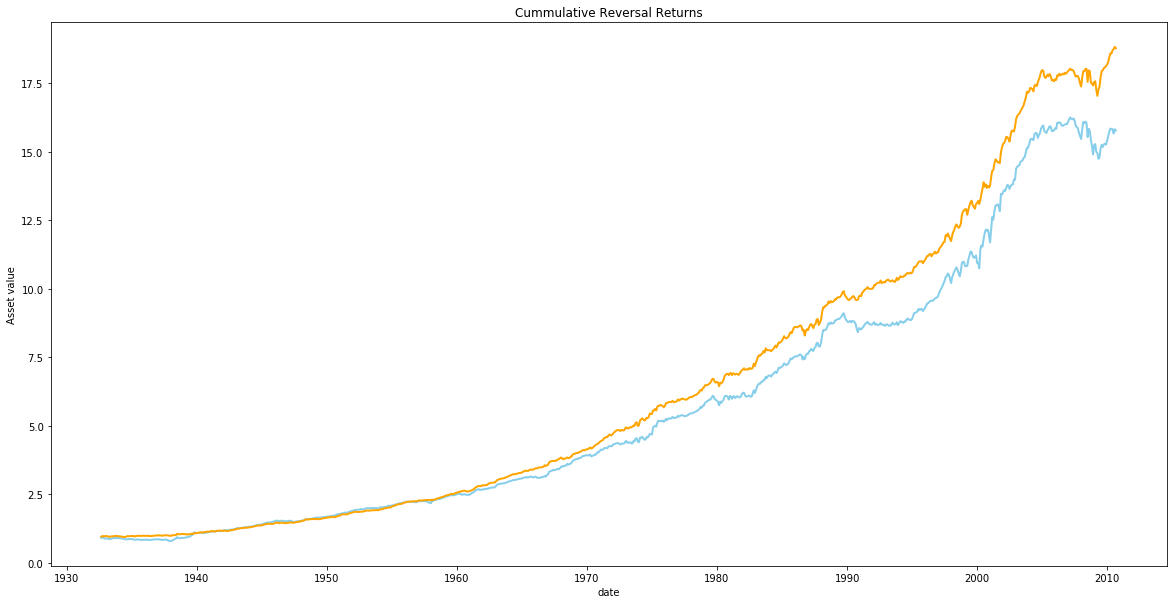

In [273]:
#Plot
plt.figure(figsize=(20,10))
plt.plot( 'date', 'conv_port_cum_RET', data=plotdata, color='skyblue', linewidth=2)
plt.plot( 'date', 'resd_port_cum_RET', data=plotdata, color='orange', linewidth=2)
plt.xlabel('date')
plt.ylabel('Asset value')
#y_pos = np.arange(len(frame['date']))
#plt.xticks(y_pos,frame['date'], rotation=2, fontsize='10', horizontalalignment='right')
plt.title('Cummulative Reversal Returns')
plt.show()

In [160]:
# loop Old draft
portfolio_return = pd.DataFrame()
for i in train['YearMonth'].unique():
    temp_train = train[train['YearMonth'] == i] 
    temp_train = temp_train.sort_values(by = ['PERMNO'])
    #count_train = len(temp_train) #143 stocks
    temp_test = test[test['YearMonth_test'] == i+1]  #date from test dataset is the real month for portfreturn
    temp_test = temp_test.sort_values(by = ['PERMNO'])
    #count_test = len(temp_test) #143 stocks
    temp_all = temp_train.merge(temp_test, on = 'PERMNO')
    #Implement portfolio strategy based on conventional or residual weight
    
    def conv(df):
        if df['test_conv_weight'].item() > 0 :
            result = - df['RET']
        elif df['test_conv_weight'].item() <0 : 
            result = df['RET']
        return result
    def resd(df):
        if df['test_red_weight'].item() > 0 :
            result = - df['RET']
        elif df['test_red_weight'].item() < 0 : 
            result = df['RET']
        return result
    new_column1 = temp_all.groupby('PERMNO',as_index=False).apply(conv)
    new_column1 = new_column1.reset_index()
    temp_all['con_real_RET'] = new_column1['RET']
    
    new_column2 = temp_all.groupby('PERMNO',as_index=False).apply(resd)
    new_column2 = new_column2.reset_index()
    temp_all['resd_real_RET'] = new_column2['RET']
    
    #Get portfolio return 
    temp_all['con_port_RET'] = temp_all['con_real_RET'].mean() 
    temp_all['resd_port_RET'] = temp_all['resd_real_RET'].mean() 
    
    portfolio_return = portfolio_return.append(temp_all.iloc[0])
    
    

KeyError: 2

In [ ]:
#Draft
YearMonth = list(set(train['YearMonth'].values.tolist()))
portfolio_return = pd.DataFrame()
for i in YearMonth:
    temp_train = train[train['YearMonth'] == i] 
    temp_train = temp_train.sort_values(by = ['PERMNO'])
    #count_train = len(temp_train) #143 stocks
    temp_test = test[test['YearMonth_test'] == i+1]  #date from test dataset is the real month for portfreturn
    temp_test = temp_test.sort_values(by = ['PERMNO'])
    #count_test = len(temp_test) #143 stocks
    temp_all = temp_train.merge(temp_test, on = 'PERMNO')
    
    #Implement portfolio strategy based on conventional or residual weight
    def conv(df):
        if df['test_conv_weight'].item() > 0 :
            result = - df['RET']
        elif df['test_conv_weight'].item() <0 : 
            result = df['RET']
        return result
    def resd(df):
        if df['test_red_weight'].item() > 0 :
            result = - df['RET']
        elif df['test_red_weight'].item() <0 : 
            result = df['RET']
        return result
    
    new_column1 = temp_all.groupby('PERMNO',as_index=False).apply(conv)
    temp_all['con_real_RET'] = new_column1.reset_index(level=0, drop=True)
    new_column2 = temp_all.groupby('PERMNO',as_index=False).apply(resd)
    temp_all['resd_real_RET'] = new_column2.reset_index(level=0, drop=True)
    
    #Get portfolio return 
    temp_all['con_port_RET'] = temp_all['con_real_RET'].mean() 
    temp_all['resd_port_RET'] = temp_all['resd_real_RET'].mean() 
    
    portfolio_return = portfolio_return.append(temp_all.iloc[0])
